# Linear Regression
선형회귀는 확률변수사이의 관계가 **선형**이라고 가정한 모델링입니다. 주어진 표본에 적합한 계수를 찾으면 두 변수사이의 관계를 대략적으로 알 수 있습니다. 2차원에서는 직선을 3차원에서는 평면을 4차원 이상에서는 초평면을 찾는 과정이라고도 할 수 있습니다.<br><br>

## population regression model
$$
Y = w_0 + w_1X_1  \dots + w_mX_m + \epsilon
$$ {#eq-poprgmodel}
위와 모집단의 확률변수사이의 관계를 선형이라고 가정한 모형을 모형을 population regression model이라고 합니다. population regression model은 **아주 작은 오차(error)**를 포함합니다.<br>

## sample regression model(vector form)
위와 같은 regression model로부터 sampling n개의 표본을 얻으면 다음과 같습니다.<br>
$$
y_1 = w_0 + w_1x_{11} + \dots + w_mx_{1m} + \epsilon_1
$$
$$
y_2 = w_0 + w_1x_{21} + \dots + w_mx_{2m} + \epsilon_2
$$
$$
\vdots
$$
$$
y_n = w_0 + w_1x_{n1} + \dots +w_mx_{nm} + \epsilon_n
$$
<br>

샘플을 벡터-행렬로 표현해서 좀 더 간단히 나타낼 수 있습니다.<br>
$$
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_n\end{bmatrix} = 
\begin{bmatrix} 
1 & x_{11} & x_{12} & \dots &x_{1m}\\
1 & x_{21} & x_{22} & \dots &x_{2m}\\
1 & x_{31} & x_{32} & \dots &x_{3m}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2} & \dots & x_{nm}\\ 
\end{bmatrix}
\begin{bmatrix}
w_0\\
w_1\\
w_2\\
\vdots\\
w_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_0\\
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n
\end{bmatrix}
$$<br>
$$
\Longleftrightarrow
\bf{y} = \bf{X}\bf{W} + \bf{\epsilon}
$${#eq-samplergmodel}
<br>
위와 같이 샘플링한 표본을 나타내는 모형을 sample regression model이라고 합니다.

Text(0.5, 1.0, 'n=200')

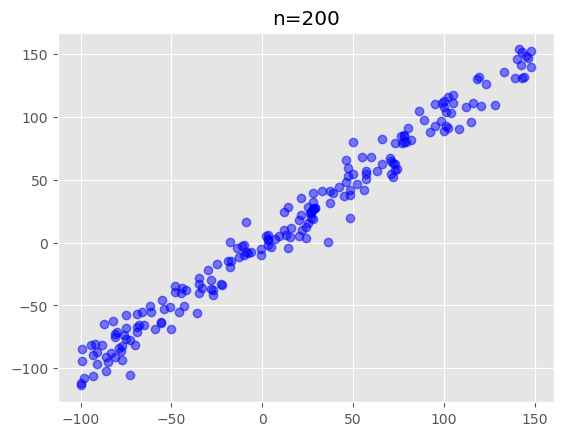

In [125]:
#| echo: false
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

n=200

#n=200인 표본 추출
torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-100,150,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1)) * 10 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.title("n=200")

$w_1=1,w_0=0$인 population regression model로부터 200개의 표본을 추출하여 시각화하면 다음과 같습니다. 선형회귀는 위와 같이 표본만 주어질때(given), 우리가 모르는 $w_1,w_0$를 추정하는 것입니다. 표본으로부터 $\bf{W}$를 추정할 수 있다면 두 변수사이의 관계가 이렇겠구나라고 알 수 있게 됩니다.<br>

::: {.callout-note}
실제문제에서 population regression model의 가중치 $\bf{w} = (w_0,w_,1,...,w_m)$는 정확히 알 수 없습니다. 우리는 표본을 통해서 가중치를 추정할 뿐입니다. 위에서는 샘플데이터를 만들기 위해 어쩔 수 없이 알게되었지만 실제문제에서는 알 수 없습니다.
:::


# Gradient Descent
경사하강법은 $\bf{w}$를 구하는 방법입니다. 경사하강법의 대략적인 흐름을 요약하면 다음과 같습니다.<br>

![nn]((1)gradient%20descent.png)<br>
그림출처 : https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html

(경사하강법의 대략적인 흐름)<br>
1. $\bf{W}$의 추정값 $\hat{\bf{W}}$을 임의적으로 가정(초기화)한다.<br>
2. 가정한 $\hat{\bf{W}}$로 $\hat{\bf{y}}$($\bf{y}$에 대한 추정값)을 구하여 실제값$\bf{y}$와 **얼마나 비슷하지 않은지,틀린지 확인**한다. => Loss function의 역할입니다.<br>
3. **기울기(편미분계수,gradient)를 사용**하여 $\hat{\bf{W}}$을 수정한다.많이 틀리면 많이수정하고 적게틀리면 적게 수정한다.<br>
4. 2번,3번을 계속해서 반복한 후 어느정도 적게 틀리면 종료한다..<br><br>

## 선형회귀의 Loss function
2번에서 구한 추정값 $\hat{\bf{W}}$이  **얼마나 틀린지,부정확한지** 알려주는 함수를 Loss function 또는 Cost function이라고 합니다. 선형회귀에서의 Loss function은 일반적으로 MSE를 사용하며 주어진 샘플에서 잔차(residual,$\hat{y}_i-y$)들을 전부 제곱하여 더한 값입니다.<br>

(Loss function)<br>
$MSE = \Sigma_{i=1}^{i=n}(y_i - \hat{y_i})^{2} = \frac{1}{n}({\bf{y} - \bf{\hat{y}}})^{T}({\bf{y} - \bf{\hat{y}}}) = \frac{1}{n}(\bf{y}-X\hat{\bf{W}})^{T}(\bf{y}-X\hat{\bf{W}})$<br>

MSE와 같은 Loss function은 우리의 추정이 **얼마나 틀렸는지**를 나타내는 $\hat{\bf{W}}$에 대한 함수입니다. 그러므로, loss function을 가장 최소화 하는 $\bf{\hat{W}}$을 찾아내면 확률변수사이의 선형관계인 $\bf{W}$를 알아낼 수 있습니다.

Text(110, 15, 'residual')

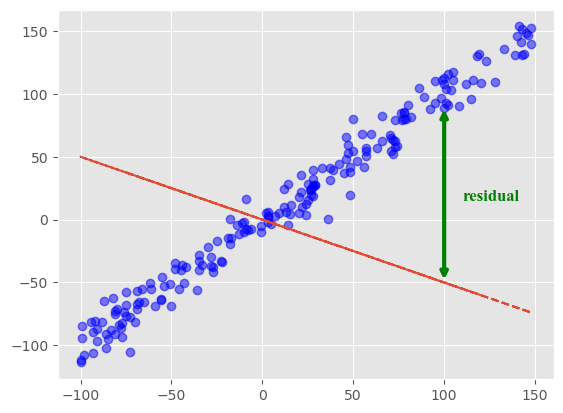

In [126]:
#| echo: false

W_hat = torch.tensor([0,-0.5]).reshape(2,-1).float()

plt.plot(X[:,1],y,"bo",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"--")
plt.annotate('',(100,-50),(100,90),xycoords='data',arrowprops=dict(arrowstyle='<->',color='green',lw=3))
font2 = {'family': 'Times New Roman',
      'color':  'green',
      'weight': 'bold',
      'size': 12,
      'alpha': 1}
plt.text(110,15, 'residual', fontdict=font2)

## Parameter update
n개의 독립변수를 가지는 다변수 스칼라 함수에 대한 Gradient는 수학적으로 다음과 같습니다.<br>

$\nabla_{X}{f(x_1,x_2,...,x_n)} = (\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},\dots,\frac{\partial f}{\partial x_n})$<br>
다변수 스칼라 함수에 그레디언트를 취하면 벡터입니다.그러므로,그레디언트를 벡터(다변수)를 입력했을 때,벡터를 출력으로 하는 벡터함수라고 생각해도 무방합니다.중요한 사실은 **임의의 공간상의 임의의 point $X$에서 스칼라함수에 대한 gradient of f = $-\nabla_{X}{f}$ 방향은 스칼라함수가 가장 급격하게 감소하는 방향**이라는 사실입니다.(증명생략)<br>

위의 사실에 의하면,우리는 임의의 $\hat{\bf{W}}$에서 Loss function이 가장 급격하게 감소하는 방향을 찾을 수 있습니다. 그러므로 감소하는 방향을 찾고 이동하고 감소하는 방향을 찾고 이동하고 반복하다보면... 궁극적인 목적인 틀린정도를 최소화하는 즉,Loss function값이 가장 작은 $\hat{\bf{W}}$를 찾을 수 있습니다. $\bf\hat{W}$를 수정하는 구체적인 수식은 다음과 같습니다.<br>

(Gradient descent parameter update)<br>
$\hat{\bf{W}}_{t} = \hat{\bf{W}}_{t-1} - \alpha\times\nabla_{W}{L}$<br>

$\hat{\bf{W}}_{t-1}$은 수정되기전의 가중치(벡터)이며 $\hat{\bf{W}_{t}}$는 파라미터를 한번 업데이트 한 후의 가중치(벡터)입니다. $t-1$의 $\hat{\bf{W_{t-1}}}$에 $-\alpha\times\nabla_{W}{L}$를 더해줌으로서 $\hat{\bf{W}}_{t-1}$은 loss function이 가장 급격히(많이)감소하는 방향으로 이동하며 $\hat{\bf{W}}_{t}$가 됩니다. $\alpha$는 학습률(learning rate)입니다. $\hat{\bf{W}}_{t-1}$과 곱해져서 얼마나 많이 또는 적게 움직일지를 결정합니다. 한번에 얼마나 이동할지에 비유한 "보폭"으로 생각할 수 있습니다.<br>

요약하자면, 경사하강법을 통하여 위와 같이 가중치$\hat{\bf{W}}$를 재귀적으로 업데이트 하면 loss function $L$이 가장 최소가 되는 지점의 $\hat{\bf{W}}$를 찾을 수 있습니다.<br><br>

## MSE에 대한 더 상세한 전개
MSE를 더 상세히 전개하면 다음과 같습니다.<br>
$MSE = \Sigma_{i=1}^{i=n}(y_i - \hat{y_i})^{2}$<br>
$= \frac{1}{n}({\bf{y} - \bf{\hat{y}}})^{T}({\bf{y} - \bf{\hat{y}}})$<br>
$= \frac{1}{n}(\bf{y}-X\hat{\bf{W}})^{T}(\bf{y}-X\hat{\bf{W}})$<br>
$= \frac{1}{n}(\bf{y^T - \hat{\bf{W}}^{T}\bf{X}^{T})(\bf{y} - \bf{X}\bf{\hat{W}}})$<br>
$= \frac{1}{n}(\bf{y^Ty-y^TX\hat{W}} - \hat{W}X^Ty + W^TX^TX\hat{W})$<br>

여기서 $\bf{y^TX\hat{W}} \in \bf{R}^{1 \times 1}$ 이므로 $\bf{y^TX\hat{W}} = (\bf{y^TX\hat{W}})^T = (\bf{\hat{W}X^Ty})$가 성립합니다.
그러므로 MSE를 정리하면 다음과 같습니다.<br>
(MSE)<br>
$MSE = \frac{1}{n}(\bf{y^Ty -2\hat{W}X^Ty + W^TX^TX\hat{W}})$<br>

## Gradient Descent에 대한 더 상세한 전개($Loss$ = MSE일 경우)

(Gradient of MSE)<br>
$\nabla{L} = MSE$<br>
$= \bf{\frac{1}{n}\frac{\partial}{\partial \hat{W}}(\bf{y^Ty - 2W^TX^T + W^TX^TX\hat{W}})}$<br>
$= \bf{\frac{1}{n}}(\bf{\frac{\partial}{\partial \hat{W}}}{y^{T}y} - \frac{\partial}{\partial \hat{W}}2W^{T}X^{T}y + \frac{\partial}{\partial\hat{W}}W^{T}X^{T}X\hat{W})$<br>
$= \bf{\frac{1}{n}(\frac{\partial}{\partial \hat{W}}{y^{T}y} - \frac{\partial}{\partial \hat{W}}2y^TXW + \frac{\partial}{\partial\hat{W}}W^TX^TX\hat{W})}$<br>
$= \bf{\frac{1}{n}[0 - 2X^Ty + (X^TX + X^TX)\hat{W}]}$<br>
$= \bf{\frac{2}{n}X^T(X\hat{W} - y)}$

(parameter update)<br>
$\bf{\hat{W}_{t} = \hat{W}_{t-1} - \alpha \times \frac{2}{n}X^T(X\hat{W} - y)}$

# 구현

In [127]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

모집단의 두 확률변수사이의 관계가 다음과 같다고 가정해봅시다.<br>
$y =  2.5 + 3x + \epsilon$<br>

모집단에서 크기가 n인 표본을 뽑으면 다음과 같습니다.

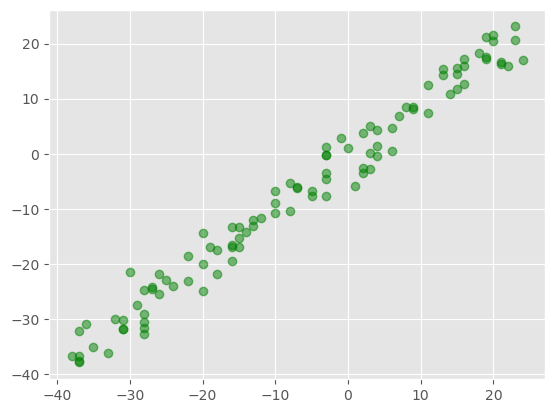

In [128]:
n=100

#n=200인 표본 추출
torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-40,25,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1))*3 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

plt.plot(X[:,1],y,"go",alpha=0.5)

경사하강법으로 표본에 가장 잘 맞는 직선을 찾아봅시다.<br>
먼저 임의의 $\bf{\hat{w}} = (w_0,w_1)=(0,-5)$로 가정합니다.

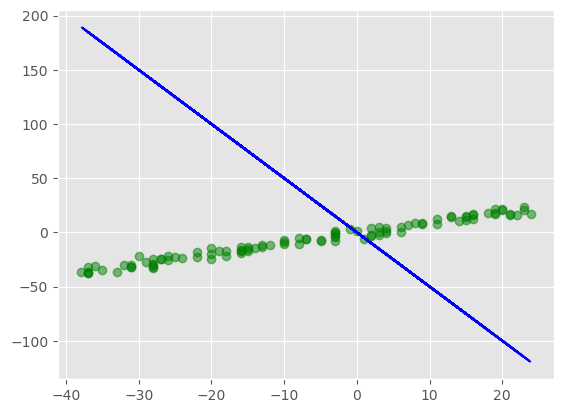

In [129]:
#1. 먼저 임의의 W_hat을 가정한다.
W_hat = torch.tensor([0,-5]).reshape(2,-1).float()

#시각화코드
plt.plot(X[:,1],y,"go",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"b--")

tensor(8.6958)
업데이트 전 W_hat : tensor([[ 0.],
        [-5.]])
업데이트 후 W_hat : tensor([[-0.8696],
        [-5.8696]])


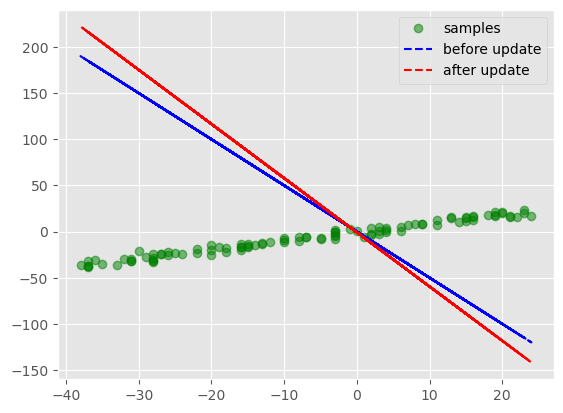

In [134]:
#n=100인 표본 추출
n=100

torch.manual_seed(2202)
W = torch.tensor([0,1]).reshape(2,-1).float()
_x = torch.randint(-40,25,(n,1))
_ones = torch.ones((n,1))
_epsilon = torch.randn((n,1))*3 #변동을 조금 더 주기 위해서 오차를 곱해줌
X = torch.concat((_ones,_x),axis=1).float()
y = X @ W + _epsilon

#plt.plot(X[:,1],y,"go",alpha=0.5)

#1. 먼저 임의의 W_hat을 가정한다.
W_hat = torch.tensor([0,-5]).reshape(2,-1).float()

#2.loss 를 계산한다.
#2.1
#pytorch의 MSELoss 클래스로 loss_fn이라는 객체(object)를 만듭니다.
#이 객체는 호출(call)하여 MSE를 계산할 수 있습니다
loss_fn = torch.nn.MSELoss()
yhat = X @ W
#2.2
#call하여 MSE를 계산
loss = loss_fn(yhat,y)
print(loss)

#3.파라미터를 업데이트 한다
print("업데이트 전 W_hat :",W_hat)
plt.plot(X[:,1],y,"go",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"b--")
W_hat.data = W_hat.data - 1e-1 * loss.data
print("업데이트 후 W_hat :",W_hat)
plt.plot(X[:,1],X@W_hat,"r--")
plt.legend(["samples","before update","after update"])

경사하강법의 흐름을 따라서 파이토치에서 구현하기위해 4가지 과정이 필요합니다.<br>
1)$\bf{\hat{y}}$<br>
2)loss<br>
3)derivative<br>
4)update & clean<br>
위와 같이 파라미터를 업데이트 한 방식을 여러번 반복하면 알맞은 직선을 얻을 수 있습니다.여기서는 위의 절차를 다 수행하지 않고 최종적으로 정리해놓은 MSE에 대한 미분을 활용하여 구현해보겠습니다.

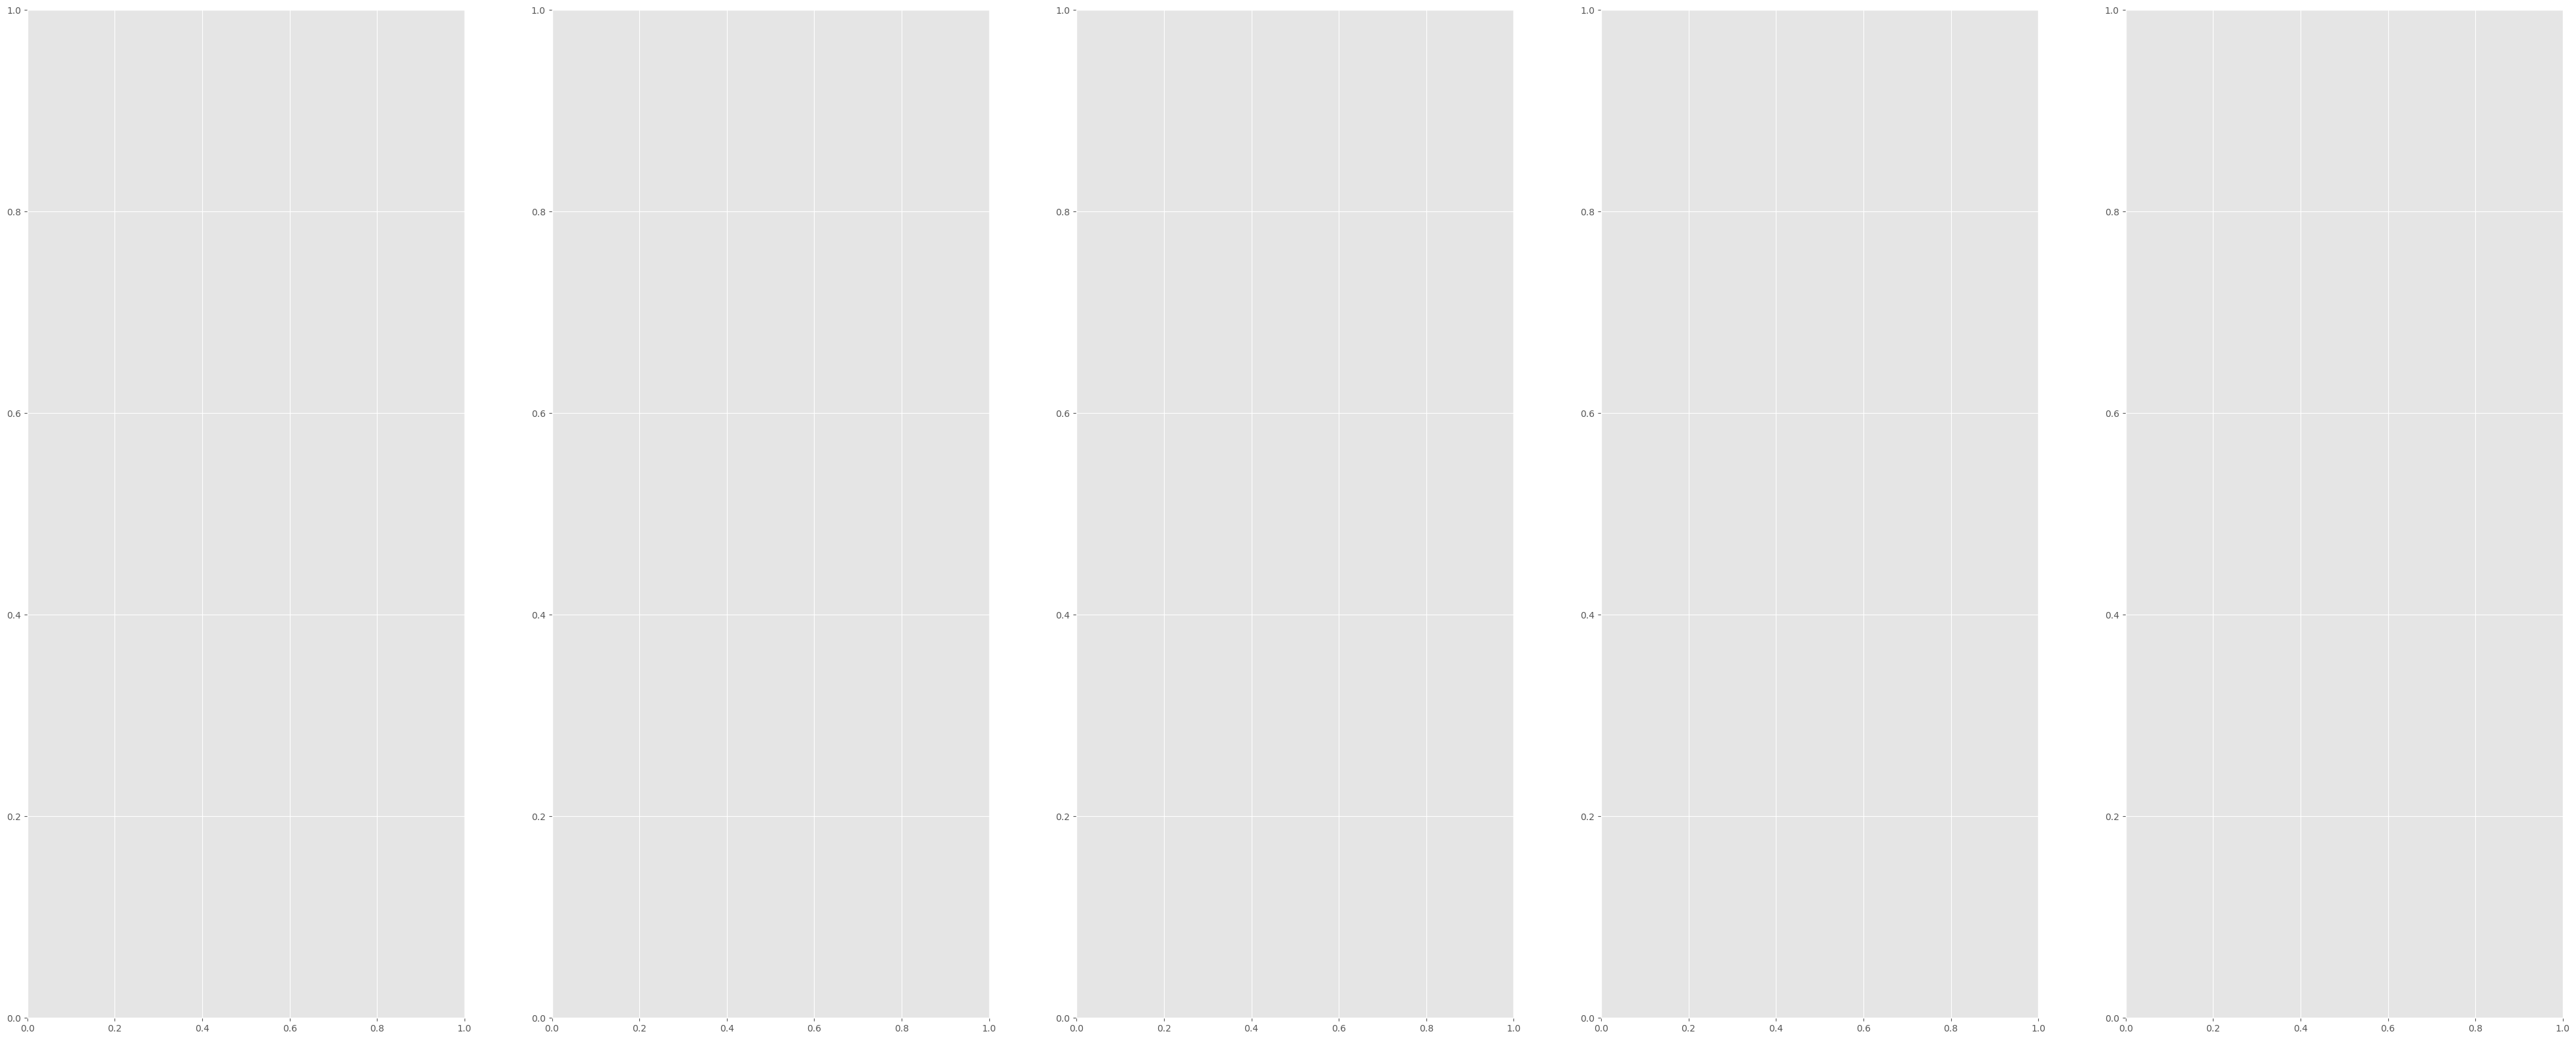

In [143]:
#상세히 전개한 parameter update수식 사용.
#2~4반복
plt.subplots(1,5,figsize=(50,20))
i=1

for epoch in range(100):
    #1~3 yhat,loss,derivative(gradient) skip
    #4 update
    W_hat.data = W_hat.data - (1e-4 * 2/n * X.T@(X@W_hat - y)).data #직선의 변화를 관찰하기위한 작은 학습률

    #시각화코드
    """
    if epoch % 9 == 0:
        plt.subplot(2,3,i)
        plt.plot(X[:,1],y,"go",alpha=0.5)
        plt.plot(X[:,1],X@W_hat,"r--")
        i+=1
    """

## 결과해석
200개의 샘플로부터 $\bf{w}$를 추정하여 $\hat{\bf{w}}= (0.017,0.972)$를 얻었습니다. population regression model의 ${\bf{w}} = (w_0,w_1) = (1,0)$을 올바르게 추정했음을 알 수 있습니다.

slope : 0.943, intercept : -0.987


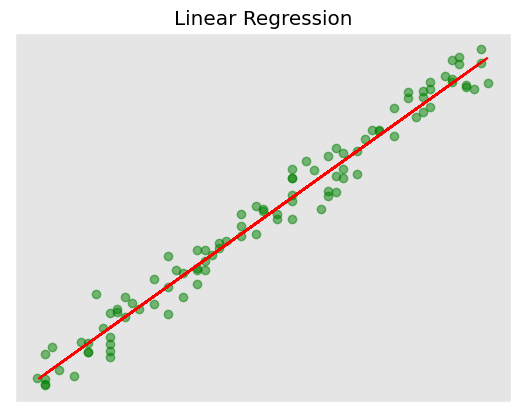

In [150]:
#plt.title("w_1 : {} // w_0: {}".format(round(W_hat[1].tolist()[0],3),round(W_hat[0].tolist()[0],3)))
plt.title("Linear Regression")
print(f'slope : {round(W_hat[1].tolist()[0],3)}, intercept : {round(W_hat[0].tolist()[0],3)}')
plt.plot(X[:,1],y,"go",alpha=0.5)
plt.plot(X[:,1],X@W_hat,"r--")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)